# Imports

In [1]:
%load_ext autoreload
from helper import *
%autoreload
%aimport helper

# Data

In [2]:
df = pd.read_csv('dataset_management\data\clean\clean.csv', parse_dates=['Timestamp'])


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46392 entries, 0 to 46391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  46392 non-null  datetime64[ns]
 1   DK_1                       46392 non-null  float64       
 2   SE_4                       46392 non-null  float64       
 3   DK_1_Exports_Volume        46392 non-null  float64       
 4   SE_4_Exports_Volume        46392 non-null  float64       
 5   Day_Ahead_Prices           46392 non-null  float64       
 6   Forecasted Load            46392 non-null  float64       
 7   Actual Load                46392 non-null  float64       
 8   Solar                      46392 non-null  float64       
 9   TTF=F_Price                46392 non-null  float64       
 10  CFI2Z3_Price               46392 non-null  float64       
 11  CO2_prices_Price           46392 non-null  float64       
 12  DE_L

Index(['Timestamp', 'DK_1', 'SE_4', 'DK_1_Exports_Volume',
       'SE_4_Exports_Volume', 'Day_Ahead_Prices', 'Forecasted Load',
       'Actual Load', 'Solar', 'TTF=F_Price', 'CFI2Z3_Price',
       'CO2_prices_Price', 'DE_LU_corr', 'DE_LU_Exports_Volume_corr', 'Year',
       'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total'],
      dtype='object')

In [4]:
# lagged columns to add
lags = [24, 36, 48, 72, 168, -168]
col_to_lag = 'Day_Ahead_Prices'
df_lagged = lag_df(df, col_to_lag, lags)

# df_lagged.dropna(how = 'any', axis = 'index', inplace = True)

In [5]:
df_lagged1=drop_lag_df(df_lagged, col_to_lag, lags)

Day_Ahead_Prices-lag24 ['2018-01-02']
Day_Ahead_Prices-lag36 ['2018-01-03']
Day_Ahead_Prices-lag48 []
Day_Ahead_Prices-lag72 ['2018-01-04']
Day_Ahead_Prices-lag168 ['2018-01-05' '2018-01-06' '2018-01-07' '2018-01-08']
Day_Ahead_Prices-lag-168 ['2023-04-12' '2023-04-13' '2023-04-14' '2023-04-15' '2023-04-16'
 '2023-04-17' '2023-04-18']


In [6]:
df_lagged1.isna().sum()
df_lagged=df_lagged1.copy()
df_lagged1.to_csv('dataset_management\data\clean\clean_lagged.csv', index=False)

In [7]:
# setting up features and target
cols_std = ['DK_1', 'SE_4', 'DK_1_Exports_Volume',
       'SE_4_Exports_Volume','Forecasted Load',
       'Actual Load', 'Solar', 'TTF=F_Price', 'CFI2Z3_Price',
       'CO2_prices_Price', 'DE_LU_corr', 'DE_LU_Exports_Volume_corr',
        'Wind Total', 'Day_Ahead_Prices-lag24',
       'Day_Ahead_Prices-lag36', 'Day_Ahead_Prices-lag48',
       'Day_Ahead_Prices-lag72', 'Day_Ahead_Prices-lag168',
       'Day_Ahead_Prices-lag-168'] 
features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']
target = 'Day_Ahead_Prices'

In [8]:
# setting up splits
train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

df_lagged.columns




Index(['Timestamp', 'DK_1', 'SE_4', 'DK_1_Exports_Volume',
       'SE_4_Exports_Volume', 'Day_Ahead_Prices', 'Forecasted Load',
       'Actual Load', 'Solar', 'TTF=F_Price', 'CFI2Z3_Price',
       'CO2_prices_Price', 'DE_LU_corr', 'DE_LU_Exports_Volume_corr', 'Year',
       'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'Day_Ahead_Prices-lag24',
       'Day_Ahead_Prices-lag36', 'Day_Ahead_Prices-lag48',
       'Day_Ahead_Prices-lag72', 'Day_Ahead_Prices-lag168',
       'Day_Ahead_Prices-lag-168'],
      dtype='object')

In [10]:
data=load_data(df_lagged)
datam=split(data)


c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project\EPF_ABA23\helper.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0=df0.append(dn[j][i], ignore_index=True)
c:\Users\Giannis\Desktop\aba\project

In [26]:
datam.isna()


,Timestamp,Day_Ahead_Prices,CO2_prices_Price,TTF=F_Price,CFI2Z3_Price,Hour,Weekday,business,Actual Load_mean4,DK_1_mean4,SE_4_mean4,DK_1_Exports_Volume_mean4,SE_4_Exports_Volume_mean4,DE_LU_corr_mean4,DE_LU_Exports_Volume_corr_mean4,Solar_mean4,Wind Total_mean4
0,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39763,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
39764,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
39765,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
39766,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [12]:
split_method = 0
df_lagged=df_lagged.drop(['Day_Ahead_Prices-lag-168'], axis = 1)


KeyError: "['Day_Ahead_Prices-lag-168'] not found in axis"

### Baseline

True
train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00
Iteration  0


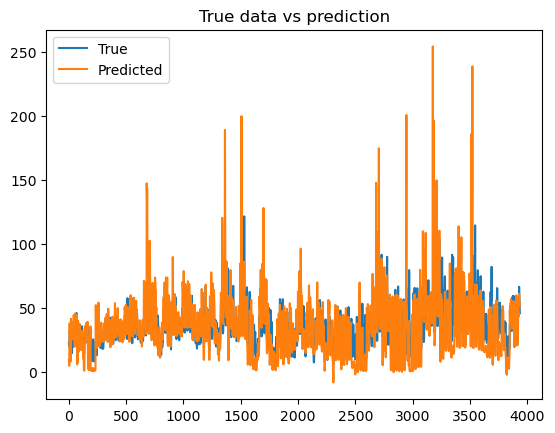

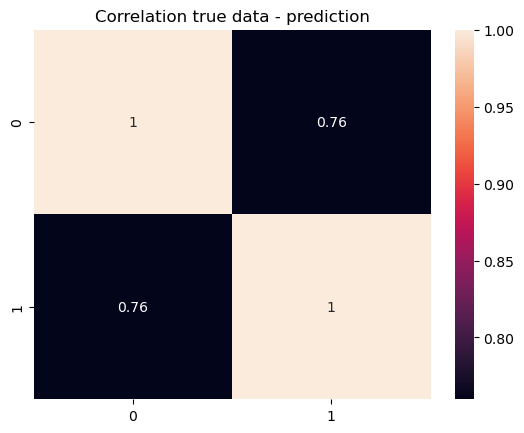

	r^2=-0.085805
Mean Absolute Error (MAE): 10.096239833142066
Mean Squared Error (MSE): 238.42418339089832
Root Mean Squared Error (RMSE): 15.440990363020706
Mean Absolute Percentage Error (MAPE): 30.82
Accuracy: 69.18
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00
Iteration  1


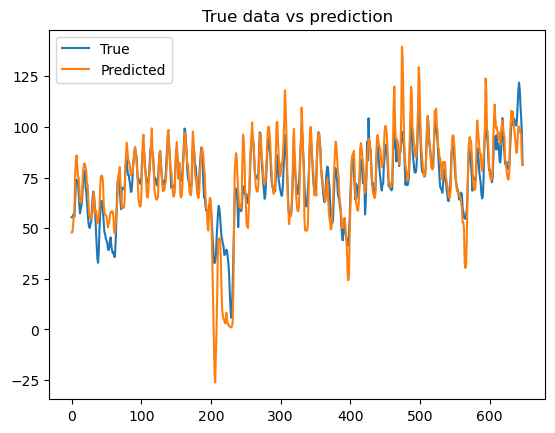

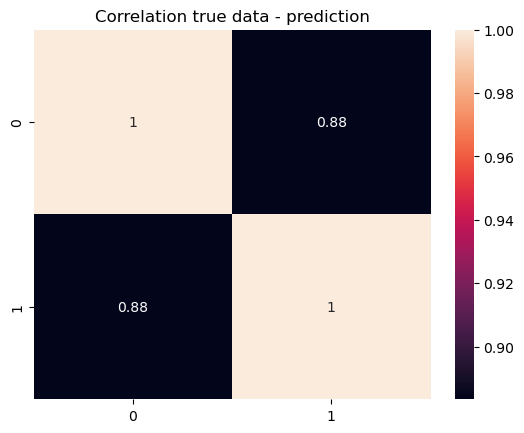

	r^2=0.586725
Mean Absolute Error (MAE): 7.728145446972798
Mean Squared Error (MSE): 116.47344266587838
Root Mean Squared Error (RMSE): 10.792286257595208
Mean Absolute Percentage Error (MAPE): 13.01
Accuracy: 86.99
train 2021-07-01 00:00:00 - 2023-01-04 23:00:00, test 2023-01-05 00:00:00 - 2023-04-11 23:00:00
Iteration  2


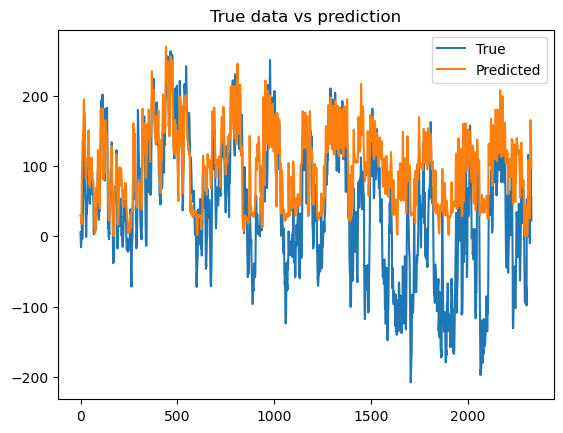

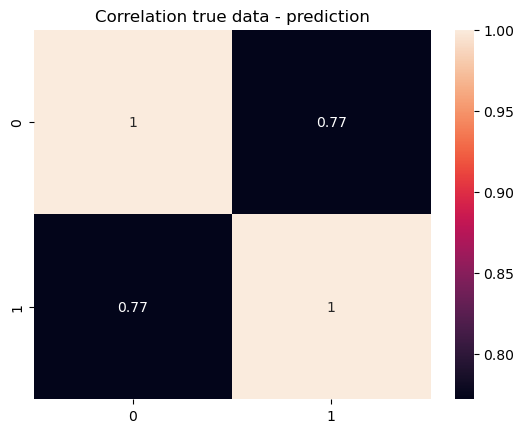

	r^2=0.189958
Mean Absolute Error (MAE): 64.34066441337514
Mean Squared Error (MSE): 7048.802787475774
Root Mean Squared Error (RMSE): 83.95714851920457
Mean Absolute Percentage Error (MAPE): 488.17
Accuracy: -388.17


In [10]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged1, k_folds, split_method,
                                         train_start, features, target, cols_std)

In [11]:
lr_model_0

[{'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False}]

### Moving average

In [12]:
df_ma_0 = run_model('ma', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std, pred_window = 24*1)

df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

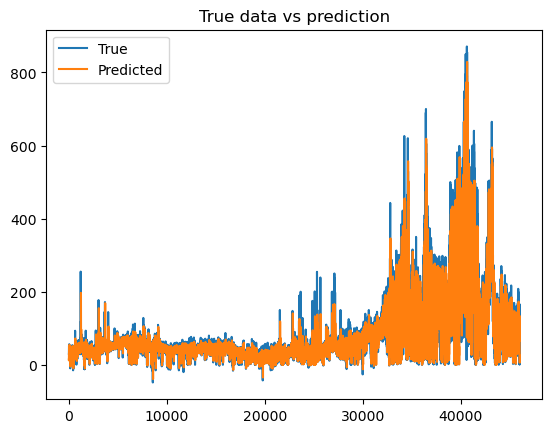

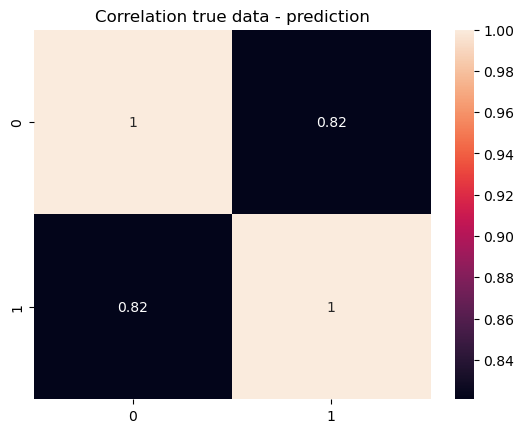

	r^2=0.648631
Mean Absolute Error (MAE): 30.947928242350486
Mean Squared Error (MSE): 3417.5602853980354
Root Mean Squared Error (RMSE): 58.459903227751205
Mean Absolute Percentage Error (MAPE): 407.38
Accuracy: -307.38


(30.947928242350486,
 3417.5602853980354,
 58.459903227751205,
 4.073821532697607,
 -3.0738215326976066)

In [ ]:
model_evaluation(ytrue, ypred)

### Random Forest

train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00
Iteration  0


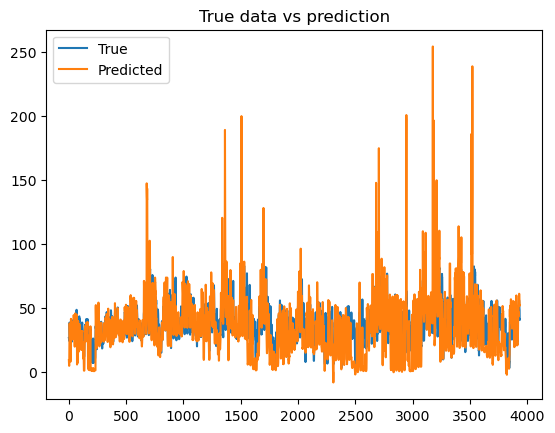

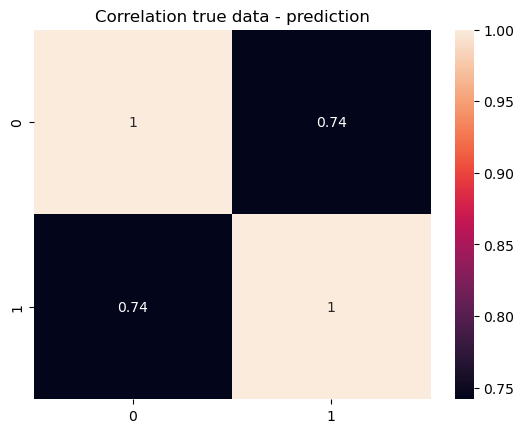

	r^2=-0.412077
Mean Absolute Error (MAE): 10.631015013246927
Mean Squared Error (MSE): 263.0817393540802
Root Mean Squared Error (RMSE): 16.21979467669305
Mean Absolute Percentage Error (MAPE): 30.79
Accuracy: 69.21
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00
Iteration  1


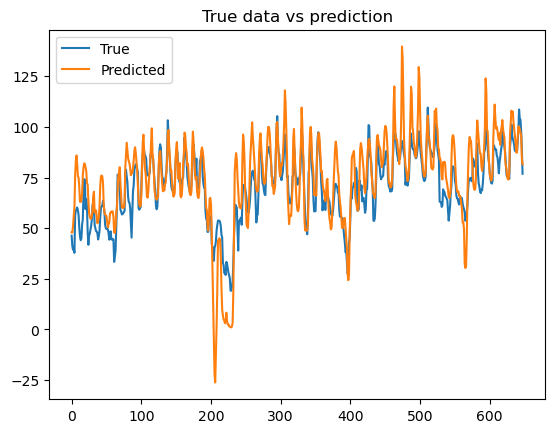

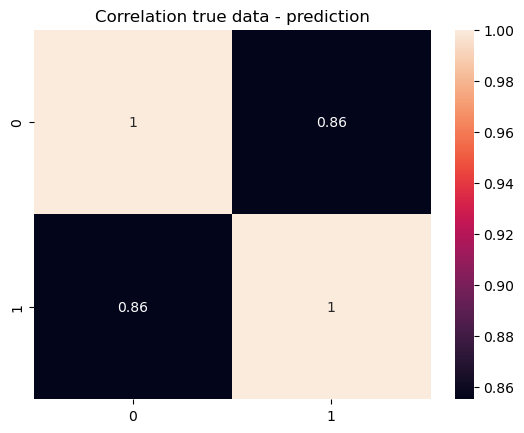

	r^2=0.451772
Mean Absolute Error (MAE): 9.262983604367577
Mean Squared Error (MSE): 153.38583586326482
Root Mean Squared Error (RMSE): 12.384903546788921
Mean Absolute Percentage Error (MAPE): 15.65
Accuracy: 84.35
train 2021-07-01 00:00:00 - 2023-01-04 23:00:00, test 2023-01-05 00:00:00 - 2023-04-11 23:00:00
Iteration  2


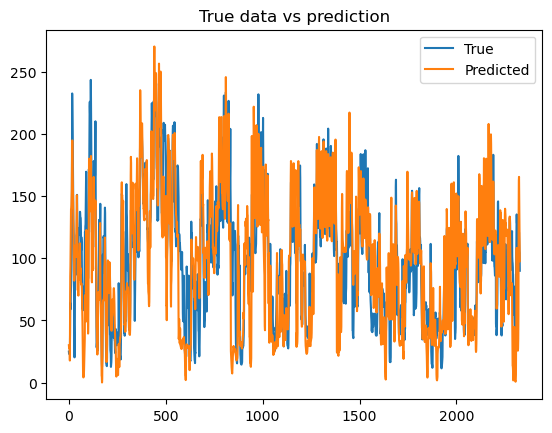

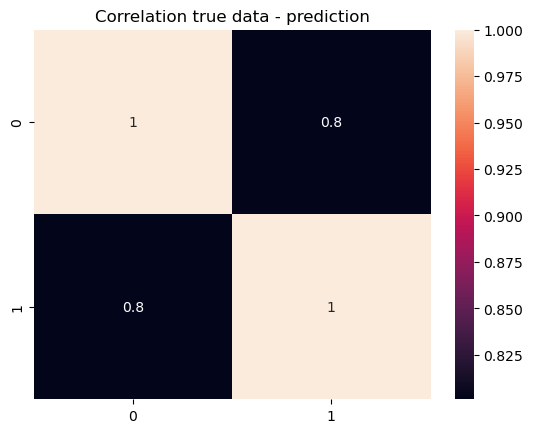

	r^2=0.558310
Mean Absolute Error (MAE): 24.908786240506295
Mean Squared Error (MSE): 998.0376951431714
Root Mean Squared Error (RMSE): 31.591734601682944
Mean Absolute Percentage Error (MAPE): 33.42
Accuracy: 66.58


In [ ]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

train 2018-01-01 00:00:00 - 2020-07-20 23:00:00, test 2020-07-21 00:00:00 - 2020-12-31 23:00:00
Iteration  0


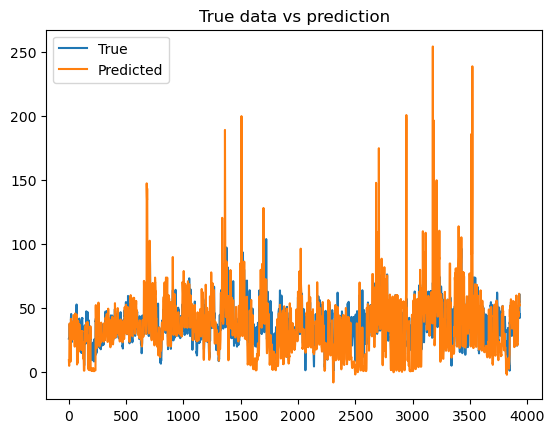

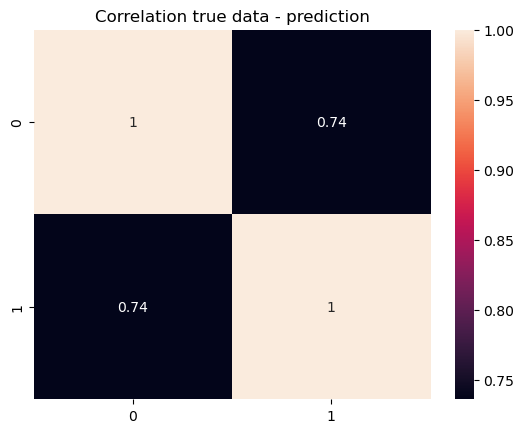

	r^2=-0.455192
Mean Absolute Error (MAE): 10.917447703458913
Mean Squared Error (MSE): 267.86094220861526
Root Mean Squared Error (RMSE): 16.36645783939259
Mean Absolute Percentage Error (MAPE): 32.54
Accuracy: 67.46
train 2021-01-01 00:00:00 - 2021-06-03 23:00:00, test 2021-06-04 00:00:00 - 2021-06-30 23:00:00
Iteration  1


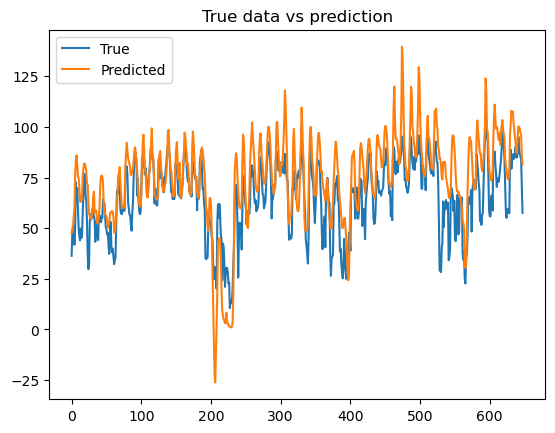

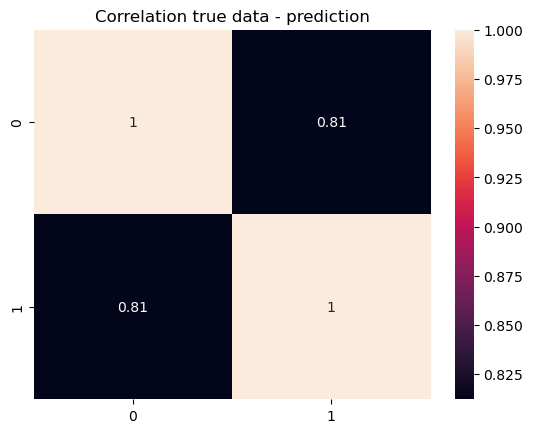

	r^2=0.176719
Mean Absolute Error (MAE): 12.708090979964645
Mean Squared Error (MSE): 255.43561164628116
Root Mean Squared Error (RMSE): 15.9823531323232
Mean Absolute Percentage Error (MAPE): 24.17
Accuracy: 75.83
train 2021-07-01 00:00:00 - 2023-01-04 23:00:00, test 2023-01-05 00:00:00 - 2023-04-11 23:00:00
Iteration  2


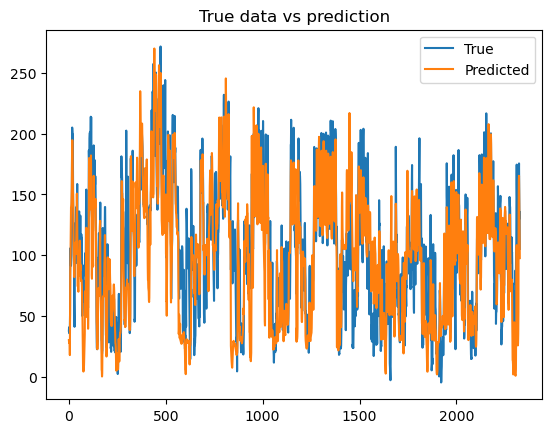

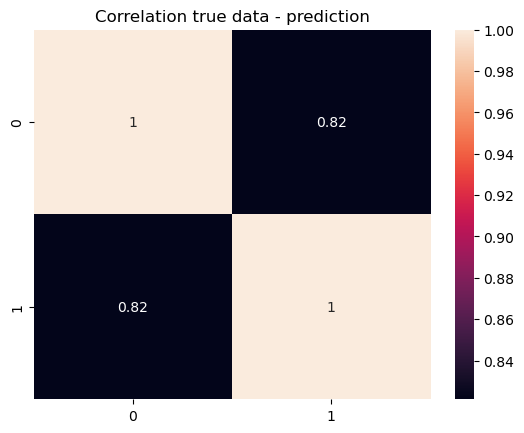

	r^2=0.625363
Mean Absolute Error (MAE): 24.999855847722017
Mean Squared Error (MSE): 1016.1623201617535
Root Mean Squared Error (RMSE): 31.877301017522697
Mean Absolute Percentage Error (MAPE): 51.17
Accuracy: 48.83


In [15]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'short_term')

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [16]:
split_method = 1

train 2018-01-01 00:00:00 - 2020-10-01 23:00:00, test 2020-10-02 00:00:00 - 2020-12-31 23:00:00
Iteration  0


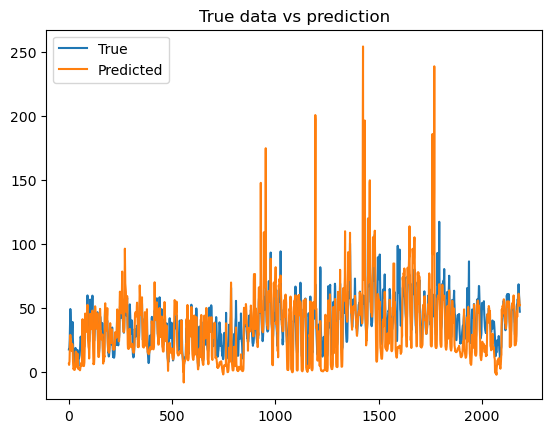

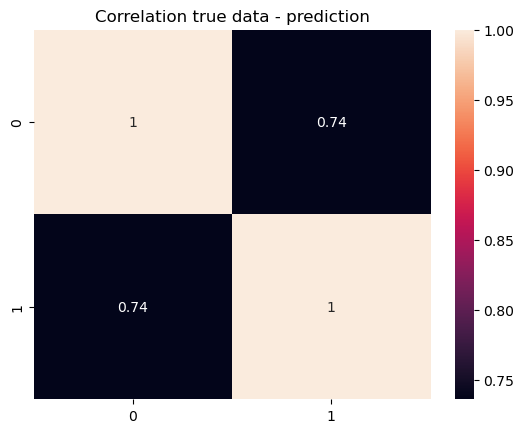

	r^2=-0.097788
Mean Absolute Error (MAE): 12.086454560139085
Mean Squared Error (MSE): 321.311190292415
Root Mean Squared Error (RMSE): 17.92515523760994
Mean Absolute Percentage Error (MAPE): 36.36
Accuracy: 63.64
train 2018-01-01 00:00:00 - 2021-03-31 23:00:00, test 2021-04-01 00:00:00 - 2021-06-30 23:00:00
Iteration  1


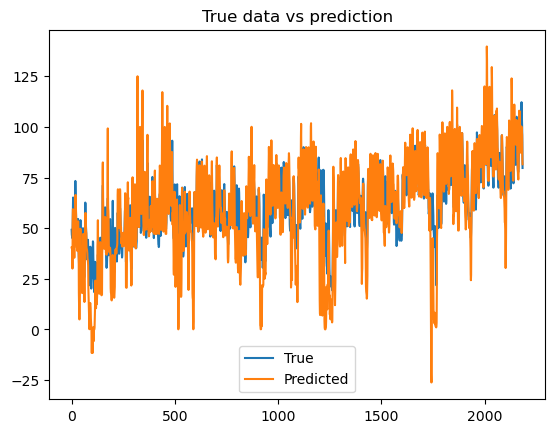

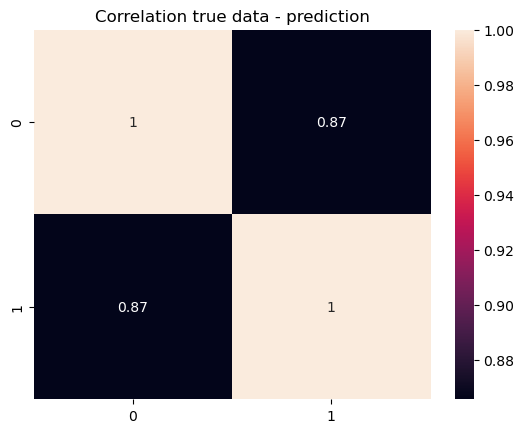

	r^2=0.385315
Mean Absolute Error (MAE): 9.271517736255358
Mean Squared Error (MSE): 169.69350637400873
Root Mean Squared Error (RMSE): 13.026646013997953
Mean Absolute Percentage Error (MAPE): 17.8
Accuracy: 82.2
train 2018-01-01 00:00:00 - 2023-01-10 23:00:00, test 2023-01-11 00:00:00 - 2023-04-11 23:00:00
Iteration  2


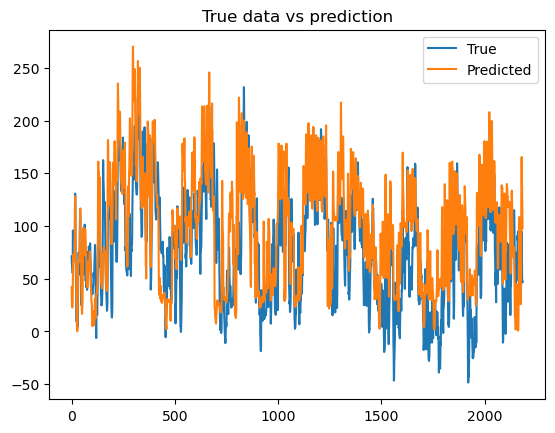

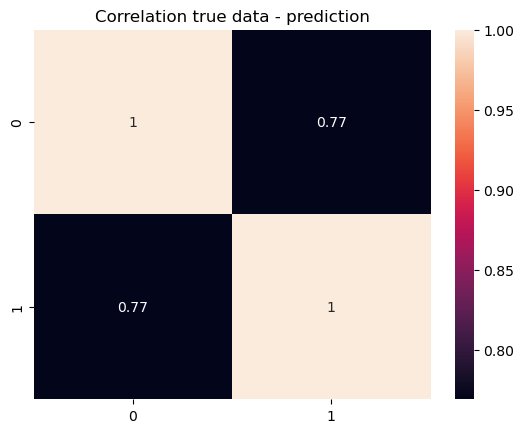

	r^2=0.392534
Mean Absolute Error (MAE): 31.85317849701888
Mean Squared Error (MSE): 1575.3173020485465
Root Mean Squared Error (RMSE): 39.690267094699
Mean Absolute Percentage Error (MAPE): 382.49
Accuracy: -282.49


In [17]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

train 2018-01-01 00:00:00 - 2020-10-01 23:00:00, test 2020-10-02 00:00:00 - 2020-12-31 23:00:00
Iteration  0


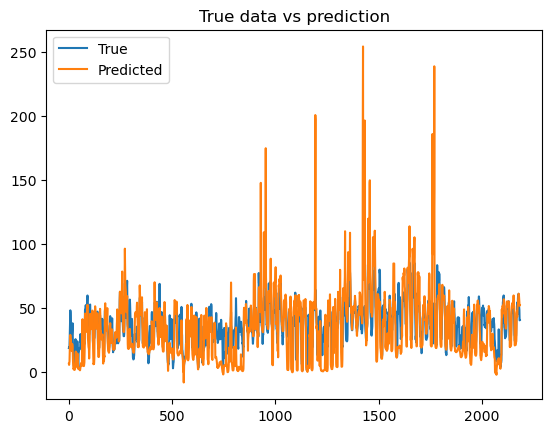

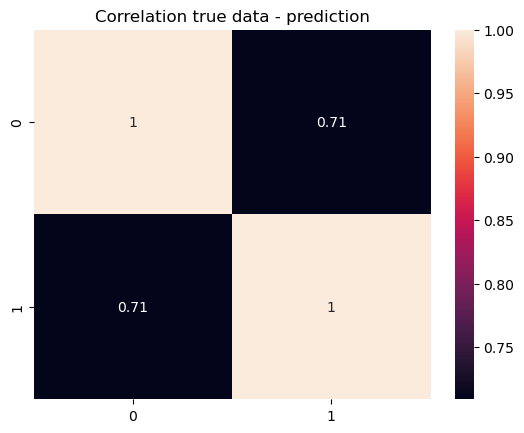

	r^2=-0.528398
Mean Absolute Error (MAE): 12.449600946675334
Mean Squared Error (MSE): 347.58514353803935
Root Mean Squared Error (RMSE): 18.64363546999456
Mean Absolute Percentage Error (MAPE): 37.79
Accuracy: 62.21
train 2018-01-01 00:00:00 - 2021-03-31 23:00:00, test 2021-04-01 00:00:00 - 2021-06-30 23:00:00
Iteration  1


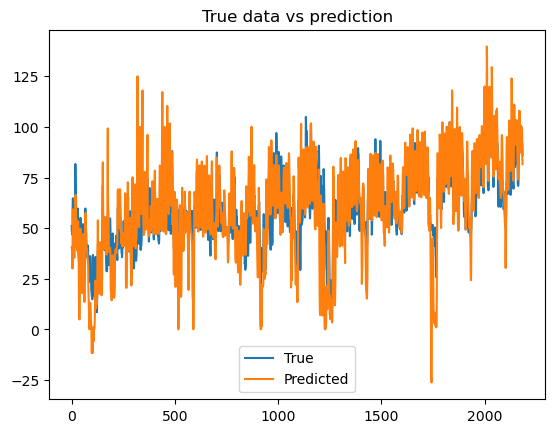

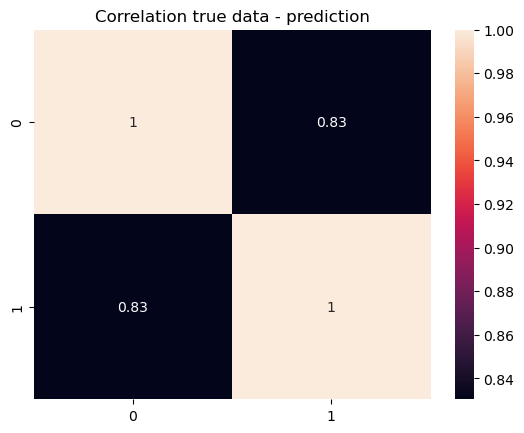

	r^2=0.389420
Mean Absolute Error (MAE): 9.833337357569372
Mean Squared Error (MSE): 186.7588603940049
Root Mean Squared Error (RMSE): 13.665974549735006
Mean Absolute Percentage Error (MAPE): 19.42
Accuracy: 80.58
train 2018-01-01 00:00:00 - 2023-01-10 23:00:00, test 2023-01-11 00:00:00 - 2023-04-11 23:00:00
Iteration  2


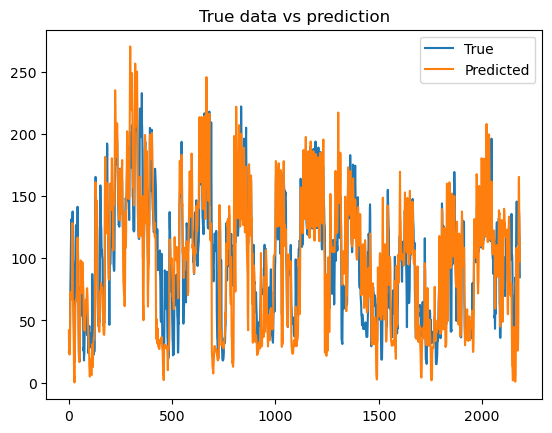

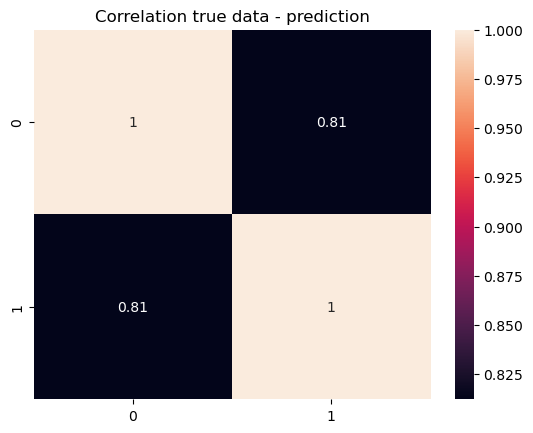

	r^2=0.558250
Mean Absolute Error (MAE): 23.67131285184552
Mean Squared Error (MSE): 945.8064213954272
Root Mean Squared Error (RMSE): 30.75396594580002
Mean Absolute Percentage Error (MAPE): 30.74
Accuracy: 69.26


In [18]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std, 'short_term')

Iteration  0


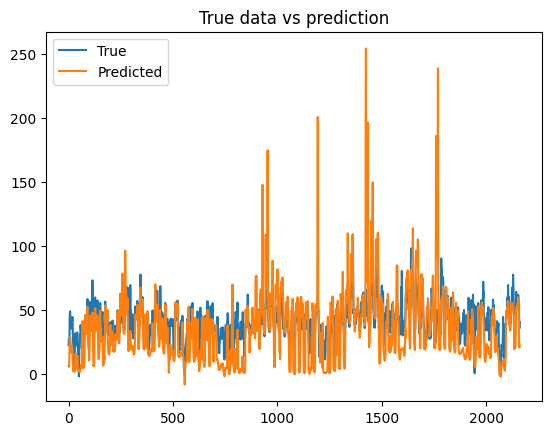

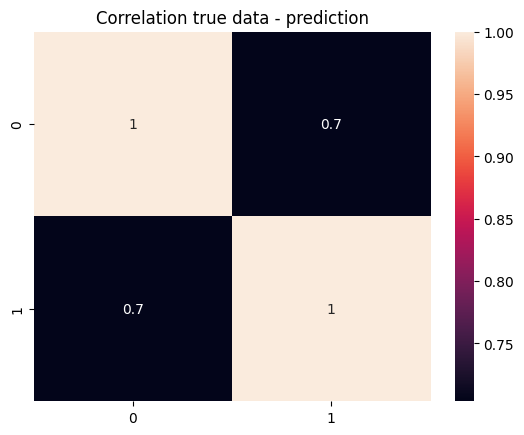

Mean Absolute Error (MAE): 14.520847127549366
Mean Squared Error (MSE): 404.86658751090533
Root Mean Squared Error (RMSE): 20.12129686453896
Mean Absolute Percentage Error (MAPE): 41.44
Accuracy: 58.56
Iteration  1


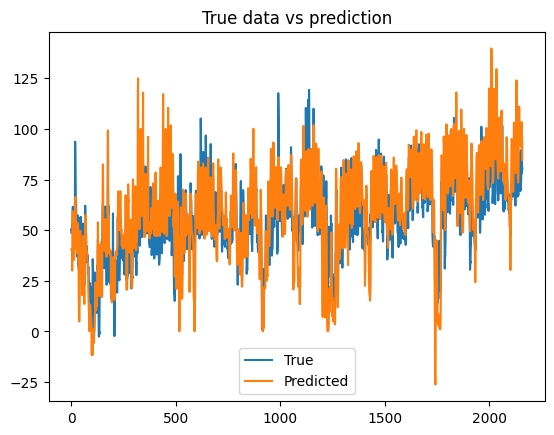

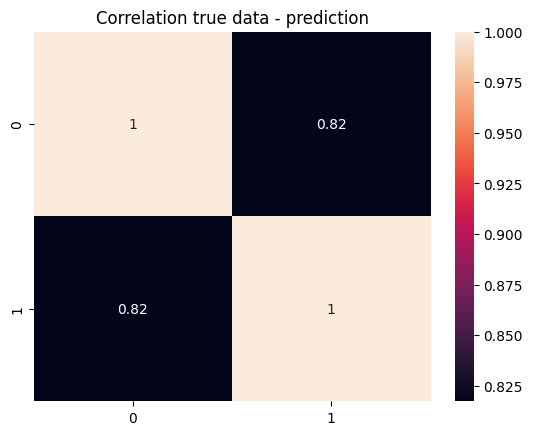

Mean Absolute Error (MAE): 11.092271169897112
Mean Squared Error (MSE): 199.35758874636792
Root Mean Squared Error (RMSE): 14.11940468810098
Mean Absolute Percentage Error (MAPE): 48.89
Accuracy: 51.11
Iteration  2


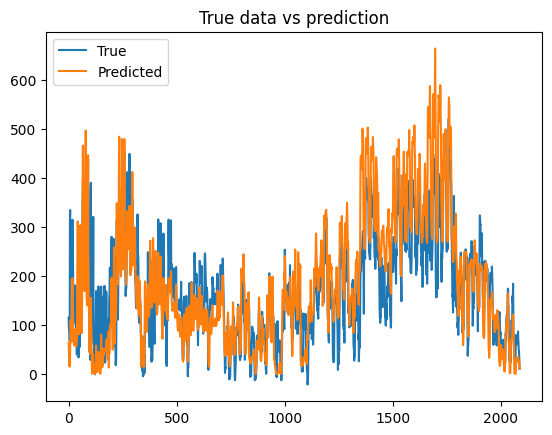

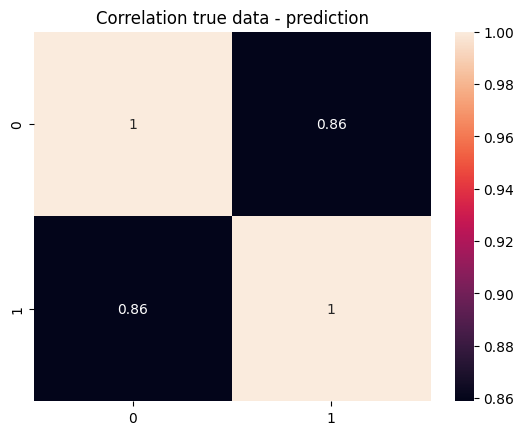

Mean Absolute Error (MAE): 52.20265526089387
Mean Squared Error (MSE): 4745.490657417283
Root Mean Squared Error (RMSE): 68.88752178310149
Mean Absolute Percentage Error (MAPE): 126.53
Accuracy: -26.53


In [ ]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)